##### Perceptron

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron


iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)


per_clf = Perceptron(random_state= 42)
per_clf.fit(X, y)
X_new = np.array([[2, 0.5], [3, 1]])
y_pred = per_clf.predict(X_new)

#### Regression MLPs

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


housing= fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes= [50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [5]:
rmse

0.5053326657968762

#### Building an Image Classifier with the Sequential API

In [6]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train= X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid= X_train_full[-5000:], y_train_full[-5000:]

In [7]:
X_train.shape

(55000, 28, 28)

In [8]:
X_train.dtype

dtype('uint8')

In [9]:
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Ankle boot'

##### Creating the model using the sequential API

In [12]:
tf.random.set_seed(42)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [15]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [16]:
model.get_layer('dense') is hidden1

True

In [17]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.01030841, -0.06164099,  0.05808872, ..., -0.06721644,
        -0.00914722,  0.02773523],
       [-0.01482046, -0.01720322,  0.06409074, ..., -0.02099765,
        -0.05513718,  0.04648534],
       [-0.05623198,  0.04789458, -0.01931117, ..., -0.02073532,
         0.05105458,  0.06832398],
       ...,
       [-0.03145289, -0.02047037, -0.01450673, ...,  0.06472638,
         0.06804311, -0.03750295],
       [-0.05460898,  0.01333321,  0.04843942, ...,  0.06073408,
        -0.0441385 , -0.04887902],
       [-0.04136474,  0.06047811,  0.01107515, ...,  0.03107924,
        -0.0179544 ,  0.00909407]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

In [21]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd", metrics=["accuracy"])
#sparse_categorical_crossentropy is used because we have sparse labels, if we had one-hot vectors, we would use categorical_crossentropy
#if we had binary classification, we would use sigmoid activation function and binary_crossentropy loss function

In [22]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - accuracy: 0.6817 - loss: 1.0220 - val_accuracy: 0.8294 - val_loss: 0.5065
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.8263 - loss: 0.5089 - val_accuracy: 0.8414 - val_loss: 0.4561
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.8417 - loss: 0.4556 - val_accuracy: 0.8474 - val_loss: 0.4318
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.8524 - loss: 0.4244 - val_accuracy: 0.8528 - val_loss: 0.4159
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.8597 - loss: 0.4024 - val_accuracy: 0.8544 - val_loss: 0.4034
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.8649 - loss: 0.3851 - val_accuracy: 0.8574 - val_loss: 0.3934
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - accuracy: 0.8690 - loss: 0.3708 - val_accuracy: 0.8600 - val_loss: 0.3853
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - accuracy: 0.8728 -

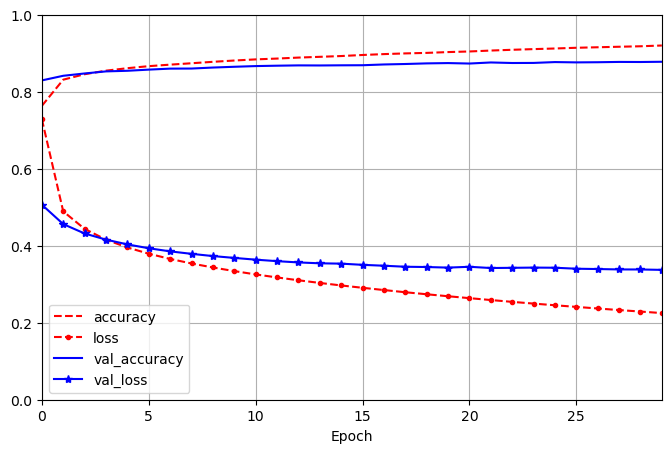

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0,29], ylim=[0,1], grid=True, xlabel="Epoch", style=['r--','r--.','b-', 'b-*'])
plt.show()

In [24]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8752 - loss: 0.3602


[0.3567982017993927, 0.8741999864578247]

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.01, 0.  , 0.8 ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
import numpy as np
y_pred= y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [27]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [28]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

##### Building a Regression MLP using the Sequential API

In [29]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [30]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model= tf.keras.models.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])


optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step - RootMeanSquaredError: 1.2586 - loss: 1.7072 - val_RootMeanSquaredError: 0.6205 - val_loss: 0.3850
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - RootMeanSquaredError: 0.6325 - loss: 0.4005 - val_RootMeanSquaredError: 0.6975 - val_loss: 0.4865
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - RootMeanSquaredError: 0.6007 - loss: 0.3610 - val_RootMeanSquaredError: 0.9206 - val_loss: 0.8475
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - RootMeanSquaredError: 0.5866 - loss: 0.3442 - val_RootMeanSquaredError: 0.8953 - val_loss: 0.8016
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - RootMeanSquaredError: 0.5748 - loss: 0.3306 - val_RootMeanSquaredError: 1.0530 - val_loss: 1.1089
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - RootMeanSquaredError: 0.5671 - loss: 0.3217 - val_RootMeanSquaredError: 1.1277 - val_loss: 1.2718
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - RootMeanSquaredError: 0.5601 - 

##### Building a Regression MLP using the Functional API

In [31]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [32]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 8)         │         17 │ input_layer_2[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 30)        │        270 │ normalization_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 30)        │        930 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization_1[… │
│ (Concatenate)       │                   │            │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [33]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step - RootMeanSquaredError: 1.6151 - loss: 2.7429 - val_RootMeanSquaredError: 0.7466 - val_loss: 0.5574
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - RootMeanSquaredError: 0.7252 - loss: 0.5269 - val_RootMeanSquaredError: 1.3427 - val_loss: 1.8030
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - RootMeanSquaredError: 0.6541 - loss: 0.4282 - val_RootMeanSquaredError: 0.9822 - val_loss: 0.9648
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - RootMeanSquaredError: 0.6331 - loss: 0.4011 - val_RootMeanSquaredError: 1.6437 - val_loss: 2.7016
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - RootMeanSquaredError: 0.6215 - loss: 0.3865 - val_RootMeanSquaredError: 1.3929 - val_loss: 1.9403
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - RootMeanSquaredError: 0.6152 - loss: 0.3786 - val_RootMeanSquaredError: 1.5583 - val_loss: 2.4283
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - RootMeanSquaredError

In [34]:
#sending different inputs through different paths

input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [35]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20, validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - RootMeanSquaredError: 1.5785 - loss: 2.6009 - val_RootMeanSquaredError: 2.0923 - val_loss: 4.3779
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - RootMeanSquaredError: 0.7291 - loss: 0.5321 - val_RootMeanSquaredError: 1.1580 - val_loss: 1.3411
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - RootMeanSquaredError: 0.6697 - loss: 0.4486 - val_RootMeanSquaredError: 0.8073 - val_loss: 0.6517
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - RootMeanSquaredError: 0.6485 - loss: 0.4208 - val_RootMeanSquaredError: 0.6543 - val_loss: 0.4280
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - RootMeanSquaredError: 0.6349 - loss: 0.4033 - val_RootMeanSquaredError: 0.6222 - val_loss: 0.3871
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - RootMeanSquaredError: 0.6238 - loss: 0.3893 - val_RootMeanSquaredError: 0.5897 - val_loss: 0.3477
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - RootMeanSquaredError

In [36]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [37]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])


In [38]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer, metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

In [39]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
    )

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - dense_2_RootMeanSquaredError: 1.4617 - dense_3_RootMeanSquaredError: 1.7473 - loss: 2.3205 - val_dense_2_RootMeanSquaredError: 0.8158 - val_dense_3_RootMeanSquaredError: 2.2849 - val_loss: 1.1211
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - dense_2_RootMeanSquaredError: 0.7023 - dense_3_RootMeanSquaredError: 0.9302 - loss: 0.5310 - val_dense_2_RootMeanSquaredError: 0.6379 - val_dense_3_RootMeanSquaredError: 0.9191 - val_loss: 0.4507
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - dense_2_RootMeanSquaredError: 0.6634 - dense_3_RootMeanSquaredError: 0.8029 - loss: 0.4607 - val_dense_2_RootMeanSquaredError: 0.9115 - val_dense_3_RootMeanSquaredError: 0.8113 - val_loss: 0.8136
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - dense_2_RootMeanSquaredError: 0.6491 - dense_3_RootMeanSquaredError: 0.7749 - loss: 0.4395 - val_dense_2_RootMeanSquaredError: 0.6406 - val_dense_3_RootMeanSquaredError: 0.8213 - val_loss:

In [40]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss = eval_results

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - dense_2_RootMeanSquaredError: 0.5808 - dense_3_RootMeanSquaredError: 0.6358 - loss: 0.3441


In [41]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [42]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(["main_output", "aux_output"], y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


##### Subclassing API to Build Dynamic Models

In [43]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output


model = WideAndDeepModel(30, activation="relu", name="wide_and_deep_model")

In [44]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer, metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=10, validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - RootMeanSquaredError: 1.4084 - RootMeanSquaredError_1: 1.8601 - loss: 2.2081 - val_RootMeanSquaredError: 1.0812 - val_RootMeanSquaredError_1: 1.8856 - val_loss: 1.4076
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - RootMeanSquaredError: 0.7324 - RootMeanSquaredError_1: 0.8808 - loss: 0.5608 - val_RootMeanSquaredError: 0.6590 - val_RootMeanSquaredError_1: 1.0478 - val_loss: 0.5006
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - RootMeanSquaredError: 0.6760 - RootMeanSquaredError_1: 0.7878 - loss: 0.4736 - val_RootMeanSquaredError: 0.6331 - val_RootMeanSquaredError_1: 0.8364 - val_loss: 0.4306
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - RootMeanSquaredError: 0.6504 - RootMeanSquaredError_1: 0.7597 - loss: 0.4386 - val_RootMeanSquaredError: 0.6116 - val_RootMeanSquaredError_1: 0.7394 - val_loss: 0.3913
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - RootMeanSquaredError: 0.6333 - RootMeanSquaredEr

#### Saving and Restoring a Model

In [45]:
import shutil

shutil.rmtree("my_keras_model", ignore_errors=True)

In [46]:
model.export("my_keras_model")

INFO:tensorflow:Assets written to: my_keras_model/assets


INFO:tensorflow:Assets written to: my_keras_model/assets


Saved artifact at 'my_keras_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): Tuple[TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)]
Output Type:
  Tuple[TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)]
Captures:
  13343087056: TensorSpec(shape=(1, 5), dtype=tf.float32, name=None)
  13343094352: TensorSpec(shape=(1, 5), dtype=tf.float32, name=None)
  13331111888: TensorSpec(shape=(1, 6), dtype=tf.float32, name=None)
  13331107856: TensorSpec(shape=(1, 6), dtype=tf.float32, name=None)
  13331117456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13331119568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13331118992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13331119952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13331119376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  

In [47]:
from pathlib import Path
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

my_keras_model/assets
my_keras_model/fingerprint.pb
my_keras_model/saved_model.pb
my_keras_model/variables
my_keras_model/variables/variables.data-00000-of-00001
my_keras_model/variables/variables.index


In [48]:
tfsm_layer = tf.keras.layers.TFSMLayer("my_keras_model")
y_pred_main, y_pred_aux = tfsm_layer((X_new_wide, X_new_deep))

In [49]:
model.save_weights("my_weights.weights.h5")

In [50]:
model.load_weights("my_weights.weights.h5")

In [51]:
model.save("my_model.keras")

In [52]:
loaded_model = tf.keras.models.load_model("my_model.keras", custom_objects={"WideAndDeepModel": WideAndDeepModel})

##### Using Callbacks

In [53]:
shutil.rmtree("my_checkpoints", ignore_errors=True)


In [54]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints.weights.h5",
                                                   save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - RootMeanSquaredError: 0.5937 - RootMeanSquaredError_1: 0.6654 - loss: 0.3616 - val_RootMeanSquaredError: 1.0858 - val_RootMeanSquaredError_1: 1.2327 - val_loss: 1.2130
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - RootMeanSquaredError: 0.5927 - RootMeanSquaredError_1: 0.6607 - loss: 0.3599 - val_RootMeanSquaredError: 1.5567 - val_RootMeanSquaredError_1: 1.5125 - val_loss: 2.4099
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - RootMeanSquaredError: 0.5925 - RootMeanSquaredError_1: 0.6563 - loss: 0.3591 - val_RootMeanSquaredError: 1.0373 - val_RootMeanSquaredError_1: 1.1291 - val_loss: 1.0959
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - RootMeanSquaredError: 0.5869 - RootMeanSquaredError_1: 0.6485 - loss: 0.3522 - val_RootMeanSquaredError: 0.6110 - val_RootMeanSquaredError_1: 0.6386 - val_loss: 0.3767
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - RootMeanSquaredError: 0.5825 - RootMeanSquaredEr

In [55]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - RootMeanSquaredError: 0.5747 - RootMeanSquaredError_1: 0.6260 - loss: 0.3366 - val_RootMeanSquaredError: 0.9944 - val_RootMeanSquaredError_1: 1.2908 - val_loss: 1.0565
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - RootMeanSquaredError: 0.5732 - RootMeanSquaredError_1: 0.6237 - loss: 0.3347 - val_RootMeanSquaredError: 0.6335 - val_RootMeanSquaredError_1: 0.6436 - val_loss: 0.4026
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - RootMeanSquaredError: 0.5700 - RootMeanSquaredError_1: 0.6180 - loss: 0.3307 - val_RootMeanSquaredError: 0.7074 - val_RootMeanSquaredError_1: 0.8576 - val_loss: 0.5239
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - RootMeanSquaredError: 0.5683 - RootMeanSquaredError_1: 0.6169 - loss: 0.3288 - val_RootMeanSquaredError: 0.7472 - val_RootMeanSquaredError_1: 0.8439 - val_loss: 0.5737
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - RootMeanSquaredError: 0.5673 - RootMeanSqua

In [56]:
#display ration between validation and training loss
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [57]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    run_id = strftime("run_%Y_%m_%d_%H_%M_%S")
    return Path(root_logdir) / run_id

run_logdir = get_run_logdir()

In [58]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##### Using TensorBoard for visualization

In [59]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/20


2024-12-01 20:09:35.046141: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2024-12-01 20:09:35.046149: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2024-12-01 20:09:35.046318: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - RootMeanSquaredError: 1.8646 - loss: 3.5730 - val_RootMeanSquaredError: 1.0039 - val_loss: 1.0079
Epoch 2/20


2024-12-01 20:09:35.388536: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2024-12-01 20:09:35.388549: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2024-12-01 20:09:35.425944: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] Profiler session collecting data.
2024-12-01 20:09:35.436220: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.
2024-12-01 20:09:35.438004: I external/local_tsl/tsl/profiler/rpc/client/save_profile.cc:147] Collecting XSpace to repository: my_logs/run_2024_12_01_20_09_34/plugins/profile/2024_12_01_20_09_35/Timothys-MacBook-Air.local.xplane.pb


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - RootMeanSquaredError: 0.9330 - loss: 0.8718 - val_RootMeanSquaredError: 0.8182 - val_loss: 0.6694
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - RootMeanSquaredError: 0.8464 - loss: 0.7176 - val_RootMeanSquaredError: 0.7737 - val_loss: 0.5985
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - RootMeanSquaredError: 0.8025 - loss: 0.6451 - val_RootMeanSquaredError: 0.7522 - val_loss: 0.5658
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - RootMeanSquaredError: 0.7707 - loss: 0.5951 - val_RootMeanSquaredError: 0.7280 - val_loss: 0.5300
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - RootMeanSquaredError: 0.7460 - loss: 0.5574 - val_RootMeanSquaredError: 0.7056 - val_loss: 0.4979
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - RootMeanSquaredError: 0.7262 - loss: 0.5282 - val_RootMeanSquaredError: 0.6866 - val_loss: 0.4714
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - RootMeanSquaredError: 0.7099 - 

In [60]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2024_12_01_19_20_17
    plugins
      profile
        2024_12_01_19_24_13
          Timothys-MacBook-Air.local.xplane.pb
    train
      events.out.tfevents.1733102653.Timothys-MacBook-Air.local.78096.0.v2
    validation
      events.out.tfevents.1733102653.Timothys-MacBook-Air.local.78096.1.v2
  run_2024_12_01_19_44_44
    events.out.tfevents.1733103884.Timothys-MacBook-Air.local.78096.2.v2
  run_2024_12_01_20_09_34
    plugins
      profile
        2024_12_01_20_09_35
          Timothys-MacBook-Air.local.xplane.pb
    train
      events.out.tfevents.1733105375.Timothys-MacBook-Air.local.83729.0.v2
    validation
      events.out.tfevents.1733105375.Timothys-MacBook-Air.local.83729.1.v2


In [62]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)


In [65]:
from tensorboard import notebook

notebook.list()


Known TensorBoard instances:
  - port 6006: logdir ./my_logs (started 0:35:45 ago; pid 83143)


### Fine-Tuning Neural Network Hyperparams

In [66]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [67]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [68]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [69]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 10s]
val_accuracy: 0.8353999853134155

Best val_accuracy So Far: 0.8640000224113464
Total elapsed time: 00h 00m 51s


In [72]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [73]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 8,
 'n_neurons': 37,
 'learning_rate': 0.008547485565344062,
 'optimizer': 'sgd'}

In [74]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 3 summary
Hyperparameters:
n_hidden: 8
n_neurons: 37
learning_rate: 0.008547485565344062
optimizer: sgd
Score: 0.8640000224113464


In [75]:
best_trial.metrics.get_last_value("val_accuracy")

0.8640000224113464

In [76]:
best_model.fit(X_train_full, y_train_full, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 352us/step - accuracy: 0.8692 - loss: 0.3567
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 350us/step - accuracy: 0.8714 - loss: 0.3479
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 350us/step - accuracy: 0.8730 - loss: 0.3404
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 368us/step - accuracy: 0.8745 - loss: 0.3345
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 345us/step - accuracy: 0.8779 - loss: 0.3276
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 343us/step - accuracy: 0.8795 - loss: 0.3247
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 353us/step - accuracy: 0.8812 - loss: 0.3213
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 369us/step - accuracy: 0.8831 - loss: 0.3146
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 352us/step - accuracy: 0.8845 - loss: 0.3103
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 373us/step - accuracy: 0.8852 - loss: 0.3091


In [77]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8522 - loss: 0.4125


In [79]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)
    
    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

#hyperband_tuner-keeps only the top 1/factor models, repeating until a single model is left
#total number of epochs for each hyperband iteration is max_epochs * (log(max_epochs)/log(factor)) **2
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(),objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2, overwrite=True, directory="my_fashion_mnist", project_name="hyperband")


In [80]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
validation_data=(X_valid, y_valid),
callbacks=[early_stopping_cb,tensorboard_cb])

Trial 60 Complete [00h 00m 13s]
val_accuracy: 0.8384000062942505

Best val_accuracy So Far: 0.8754000067710876
Total elapsed time: 00h 06m 43s


In [84]:
bayesian_opt_tuner = kt.BayesianOptimization(MyClassificationHyperModel(), objective= "val_accuracy", max_trials=10, seed=42, alpha= 1e-4, beta= 2.6, overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")
bayesian_opt_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb])

Trial 10 Complete [00h 00m 09s]
val_accuracy: 0.8303999900817871

Best val_accuracy So Far: 0.854200005531311
Total elapsed time: 00h 01m 47s
